# Clase

- Los prediccion de datos continuos es medida a traves del error cuadratico medio. En la prediccion de datos clasificados, lo que se quiere aumentar es la cantidad de datos correctamente predichos (cantidad de verdaderos positivos y verdaderos negativos), y reducir la cantidad de datos erronamente predichos (cantidad de falsos positivos y falsos negativos).

In [3]:
import pandas as pd
import numpy as np

import lec6_graphs as gfx
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

df = pd.read_csv('wells.csv').drop(columns='index')
df.head()

,y,dist100,arsenic,educ4,assoc
0,1,0.16826,2.36,0.0,0
1,1,0.47322,0.71,0.0,0
2,0,0.20967,2.07,2.5,0
3,1,0.21486,1.15,3.0,0
4,1,0.40874,1.10,3.5,1


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns='y')
y = df['y']

X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11238)

Aqui se utiliza StandarScaler (Que hace dato nuevo = dato antiguo - media de donde viene el dato / std de donde viene el dato), para tener un modelo mas uniforme

In [18]:
scaler = StandardScaler().fit(X_train_pre)

X_train = scaler.transform(X_train_pre)
X_test = scaler.transform(X_test_pre)


In [19]:
model = LogisticRegression().fit(X_train, y_train)
model.coef_

array([[-0.33266754,  0.5907759 ,  0.14256382, -0.05195545]])

In [20]:
yhat = model.predict(X_test)
yhat[:20]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [21]:
yhat_prob = model.predict_proba(X_test)
yhat_prob[:20]

array([[0.67496862, 0.32503138],
       [0.33455362, 0.66544638],
       [0.09020209, 0.90979791],
       [0.70352108, 0.29647892],
       [0.4038352 , 0.5961648 ],
       [0.45532677, 0.54467323],
       [0.30957084, 0.69042916],
       [0.35040536, 0.64959464],
       [0.4552455 , 0.5447545 ],
       [0.46802757, 0.53197243],
       [0.45140063, 0.54859937],
       [0.41529136, 0.58470864],
       [0.21485762, 0.78514238],
       [0.60828943, 0.39171057],
       [0.57261071, 0.42738929],
       [0.58069364, 0.41930636],
       [0.53925461, 0.46074539],
       [0.43370276, 0.56629724],
       [0.40139424, 0.59860576],
       [0.40709762, 0.59290238]])

# Prediccion con el Modelo Logistico

Hay 2 formas de predecir con un modelo logistico por machine learning:

1. Prediccion por clasificacion: con model.predict()
2. Prediccion por probabilidad: con model.predict_proba(). Aqui se obtiene la probabilidad de obtener cada una de las categorias entregadas (probabilidad de obtener la categoria 0, 1, etc)

# Metricas de Desempeno

Hay 2 formas de determinar que tan bueno es nuestro modelo de clasificacion:

1. Prediccion de probabilidad continua
2. Prediccion de clase: Donde se ve la cantidad de falsos positivos y falsos negativos

Se ocupa mucho mas la prediccion de clase en estos tipos de modelos!

# Matriz de Confusion

Permite ver la cantidad de observaciones predichas y la cantidad de observaciones reales. La forma de la matriz de confusion es la siguiente:

-|Categoria Verdadera| -
--|------|---
**Prediccion**|Verdadero|Falso
Positivo|Verdadero Positivo|Falso Positivo
Negativo|Falso Negativo|Verdadero 

En la diagonal de izq a derecha estan los valores reales. En los otros los falsos. Un Falso positivo, es un valor que fue predicho positivo, pero que en verdad es negativo. Un falso negativo, es un valor que fue predicho negativo, pero que en verdad es positivo.

In [22]:
from sklearn.metrics import confusion_matrix

m1_confusion = confusion_matrix(y_test, yhat)
m1_confusion

array([[174, 248],
       [120, 455]])

## Medida de exactitud

Dentro de una matriz de confusion, la exactitud se mide como:

Cantidad de casos bien predichos / Cantidad de casos totales

O sea:

N VP + N VN / Total

In [23]:
from sklearn.metrics import accuracy_score
m1_acc = accuracy_score(y_test, yhat)
m1_acc

0.6308926780341023

In [24]:
m1_acc - 0.5

0.13089267803410232

In [ ]:
# Esto significa que nuestro modelo clasifica en un 13% mas que un clasificador
# aleatorio (ya que es un resultado 1 o 0, por lo que al tirar una moneda aleatoriamente se
# obtendria siempre 0.5) Naizuuu

# Accuracy, precision, recall y f1

La exactitud por si sola es enganosa, ya que no explica que esta pasando con el modelo (hay mas falsos positivos o mas falsos negativos). Por lo tanto, hay 2 metricas mas:

Precision: Cantidad de etiquetas positivas correctamente asignadas.

Precision = Verdadero Positivo / Verdadero Positivo + Falsos Positivos

Es la fila de positivos predichos

Responde a la pregunta, Cuantos verdaderos positivos capto el modelo?

In [25]:
from sklearn.metrics import precision_score
m1_precision = precision_score(y_test, yhat)
m1_precision

0.647226173541963

## Recall

Identifica la proporcion de Verdaderos Positivos identificados dentro de la categoria verdadera de positivos:

Recall = VP / VP + FN (Falsos Negativos)

Es la columna de la Categoria Verdadera Positiva

Responde a la pregunta, Cuantos verdaderos positivos se encontraron?


In [27]:
from sklearn.metrics import recall_score
m1_recall = recall_score(y_test, yhat)
m1_recall

# O sea, que se identificaron el 79% de los verdaderos positivos

0.7913043478260869

## F1 Score

Es la media de Precision y Recall (Precision + Recall / 2)

In [28]:
from sklearn.metrics import f1_score
m1_f1 = f1_score(y_test, yhat)
m1_f1

0.7120500782472613

Todos estos scores se pueden reportar con classificaion_report

In [29]:
from sklearn.metrics import classification_report
report = classification_report(y_test, yhat)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.41      0.49       422
           1       0.65      0.79      0.71       575

    accuracy                           0.63       997
   macro avg       0.62      0.60      0.60       997
weighted avg       0.62      0.63      0.62       997



# ROC Curve

Receiving Operation Curve, permite ver la metrica de la diagonal de las predicciones erroneas (Falsos Positivos o falsas alarmas y falsos negativos)

In [32]:
from sklearn.metrics import roc_curve

yhat_pr = model.predict_proba(X_test)[:, 1]
false_positive, true_positive, threshold = roc_curve(y_test, yhat_pr)

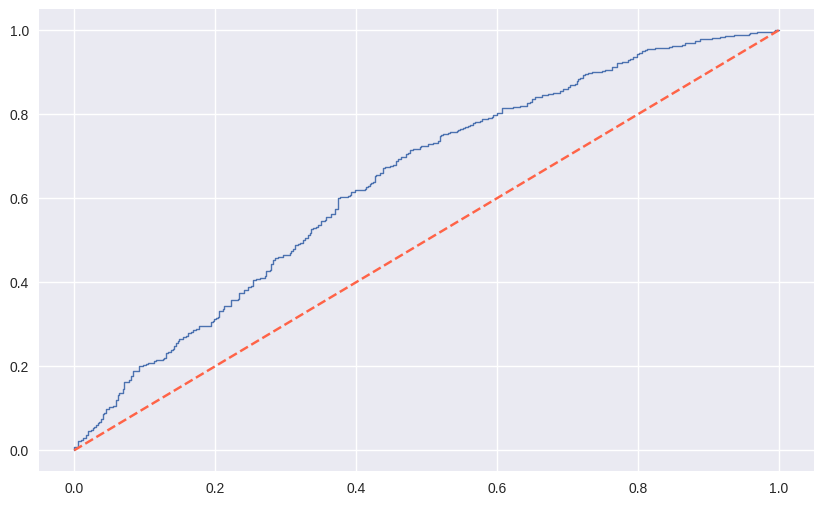

In [34]:
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], linestyle='--', color='tomato')